
# You can use this code for:
### 1) Bar chart with two variables in x-axis
### 2) Custom annotations showing the change in each bar

In this part of code, we will show how to create a bar chart with two variables in x-axis so that the bars related to each variable are separated by a different color.
We will also have custom annotations that show the difference between bars of each category. For example, the annotations could show the difference in sales from one year to another.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('TestData.csv')
df.head(3)

,GENERIC_NAME,2018,2019,Difference,Difference_Percentage
0,Apple,126596,118589,8007,6.3
1,Banana,57968,54027,3941,6.8
2,Apricot,43587,39317,4270,9.8


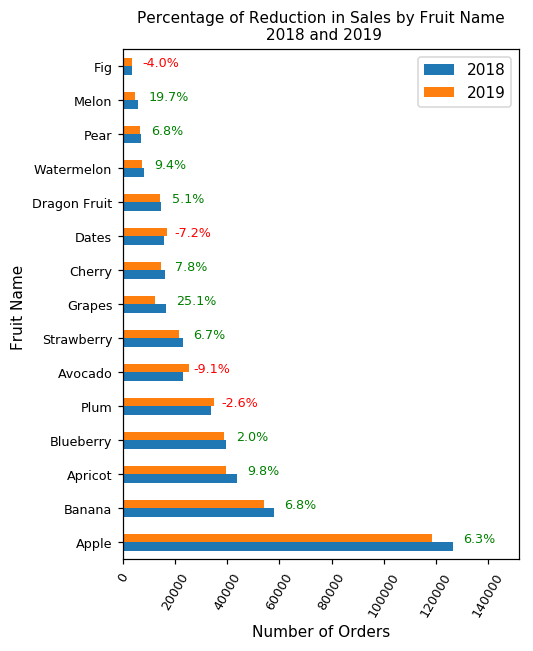

In [ ]:
fig, ax = plt.subplots(figsize=(12,8), dpi = 110) # Size and the resolution of the chart

df.plot.barh(x = 'GENERIC_NAME', y = ['2018', '2019'], rot = 0, ax = ax) # Creating the chart and specifying the axis

title = 'Percentage of Reduction in Sales by Fruit Name\n 2018 and 2019'

# Setting the chart title and axis labels:
plt.title(title, fontsize = 'medium')
plt.xlabel('Number of Orders')
plt.ylabel('Fruit Name ')

# Setting the margin for the chart and font sizes for axis labels:
plt.margins(0.2)
plt.xticks(rotation=60,fontsize = 'small')
plt.yticks(fontsize = 'small')
plt.subplots_adjust(left=0.6, bottom=0.3)


# Creating annotations and also specifying the colors:\
# Green for increase in sales and red for reduction
for i, v in enumerate(df['2018']):
    if(df['Difference_Percentage'][i]<0):
        c = 'red'
    else:
        c='green'
    ax.text(v+4000, i, str(df['Difference_Percentage'][i])+'%', color = c, fontsize = 'small')

# In case you want to save the chart on a .png file
#plt.savefig('Reduction.png')

# Chart with two y axis - R Value (Correlation Coefficient)

In [ ]:
df_02 = pd.read_csv('Test_Data_02.csv')
df_02.head(3)


,Sales Representatives,Number of Customers Visited,Items Sold 2018,Items Sold 2019
0,SalesRep_001,15019,1834,2232
1,SalesRep_002,10533,1114,1480
2,SalesRep_003,10304,2239,2803


In [ ]:
df_02.index

RangeIndex(start=0, stop=463, step=1)

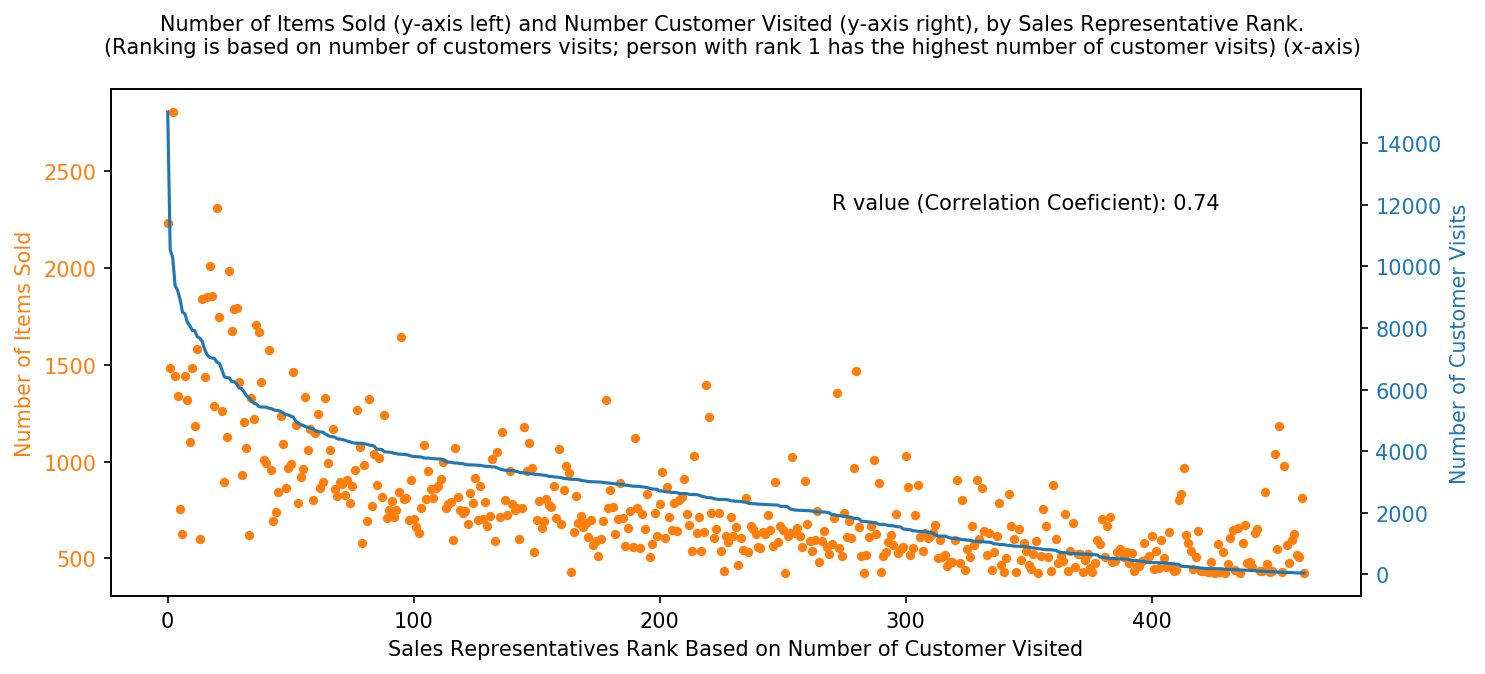

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = df_02.index  # X-axis
y1 = df_02['Items Sold 2019']  # y-axis left
y2 = df_02['Number of Customers Visited']  # y-axis right




fig, ax1 = plt.subplots(figsize=(10,4.6), dpi = 150) # Creating the plot, specifying size and resolution

color = 'tab:orange'
ax1.set_xlabel('Sales Representatives Rank Based on Number of Customer Visited')
ax1.set_ylabel('Number of Items Sold', color=color)
ax1.scatter(x, y1, color=color, s= 12) # Creating the scatter plot
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Creating a second axes that is using the same x axis

color = 'tab:blue'
ax2.set_ylabel('Number of Customer Visits', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Calculating the R Values (Correlation Coefficient, Pearson method)
r_value = df_02[['Number of Customers Visited','Items Sold 2019']].corr(method ='pearson').iloc[0][1].round(2)

# Preparing the text for our annotation
annotaion_text = "R value (Correlation Coeficient): " + str(r_value)

# Annotation
style = dict(size=10, color='black')
ax1.text(270, 2300, annotaion_text, **style)



plt.title('Number of Items Sold (y-axis left) and Number Customer Visited (y-axis right), by Sales Representative Rank. \n(Ranking is based on number of customers visits; person with rank 1 has the highest number of customer visits) (x-axis) \n ', fontsize='medium')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# 3) Bar Chart With Annotations

In [ ]:
df_02 = pd.read_csv('Test_Data_02.csv')
df_02.head(3)

,Sales Representatives,Number of Customers Visited,Items Sold 2018,Items Sold 2019
0,SalesRep_001,15019,1834,2232
1,SalesRep_002,10533,1114,1480
2,SalesRep_003,10304,2239,2803


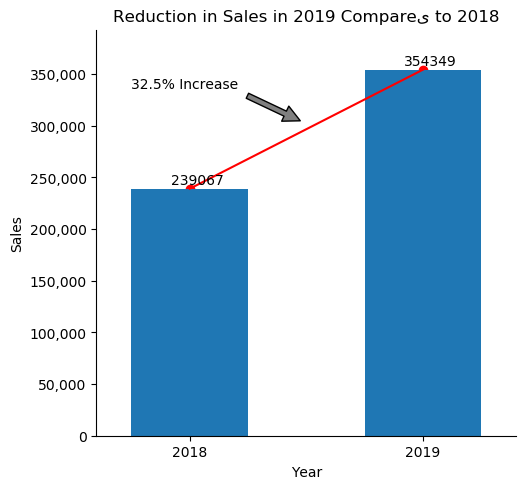

In [ ]:
plt.figure(figsize=(6,7), dpi=100)

xvals = ['2018', '2019']
yvals = [sales_2018, sales_2019]


plt.bar(xvals, yvals, width=0.5, color='#1f77b4')

plt.margins(0.1)

plt.subplots_adjust(bottom=0.3, left=0.2)
plt.title('Reduction in Sales in 2019 Compareی to 2018')
plt.xlabel('Year')
plt.ylabel('Sales')


#Having the y axis formatted as thousand separated
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Calculating the values to show on top of the bars:
sales_2018 = df_02['Items Sold 2018'].sum()
sales_2019 = df_02['Items Sold 2019'].sum()

# Showing the values above the bars
for i, v in enumerate(yvals):
    ax.text(i-0.08, v+4500, str(v))

# Creating the custom annotation with arrow:
annotation_text = str(((sales_2019 - sales_2018)*100/sales_2019).round(1)) +"% Increase" # The text

ax.annotate(annotation_text, xy=(0.5, 302000), xytext=(-0.25, 336000),
            arrowprops=dict(facecolor='gray', shrink=0.09)) # The arrow

plt.plot(xvals,yvals, '-', c='red')  # The red line showing the reduction
plt.scatter(xvals,yvals, c='red') # Creating the two red dots on top of the bars

In [ ]:
df_02 = df_02.sort_values(by='Items Sold 2018', ascending = False)[:100]
df_02.reset_index(inplace=True)
df_02[30:50]

,level_0,index,Sales Representatives,Number of Customers Visited,Items Sold 2018,Items Sold 2019
30,30,211,SalesRep_212,2620,1295,727
31,31,41,SalesRep_042,5393,1246,1574
32,32,10,SalesRep_011,7920,1215,1481
33,33,303,SalesRep_304,1410,1169,553
34,34,72,SalesRep_073,4353,1166,828
35,35,104,SalesRep_105,3781,1144,1086
36,36,280,SalesRep_281,1808,1139,1465
37,37,50,SalesRep_051,5134,1133,989
38,38,91,SalesRep_092,3957,1120,794
39,39,1,SalesRep_002,10533,1114,1480


In [ ]:
df_02.index[df_02['Sales Representatives']=='SalesRep_036'][0]

65

In [ ]:
df_02[df_02['Sales Representatives']=='SalesRep_036']['Items Sold 2019'].values[0]

1219

In [ ]:
def individual_report(sales_rep_ID):

    sales_rep_ID = sales_rep_ID
    x_person = df_02.index[df_02['Sales Representatives']==sales_rep_ID][0]
    y_person = df_02[df_02['Sales Representatives']==sales_rep_ID]['Items Sold 2019'].values[0]



    # Draw plot
    fig, ax = plt.subplots(figsize=(15,8), dpi= 100)


    y = (df_02['Items Sold 2018'])
    y2 = (df_02['Items Sold 2019'])
    x = np.arange(0,len(y))



    colors = []

    for i in np.arange(0,len(df_02)):

        tests_first_year = df_02['Items Sold 2018'].iloc[i]
        tests_second_year = df_02['Items Sold 2019'].iloc[i]

        if(tests_second_year < tests_first_year):
            colors.append('red')
        else:
            colors.append('green')


    colors[x_person]='purple'

    plt.plot(x,y, '-', c='blue')

    ax.vlines(x, ymin=y, ymax=y2, color=colors, alpha=0.7, linewidth=0.2)
    ax.scatter(x, y=y2, s=15, color=colors, alpha=0.7)


    plt.title('Change in Number of Items Sold by Sales Representatives in 2019 Compared to 2018')
    plt.xlabel('Sales Representatives, ranked by number of sales in 2018')
    plt.ylabel('Number of Items Sold')
    plt.xticks(np.arange(min(x), max(x)+1, 5))


    # Creating the custom annotation with arrow:
    annotation_text = 'You are here!' # The text



    ax.annotate(annotation_text, xy=(x_person + 0.7, y_person +40), xytext=(x_person + 7, y_person+300),
                arrowprops=dict(facecolor='white', shrink=1), fontsize=12) # The arrow

    plt.text(0,-500,'Hello this is your data')

    filename = sales_rep_ID + '.png'
    plt.savefig(filename)

    plt.show()




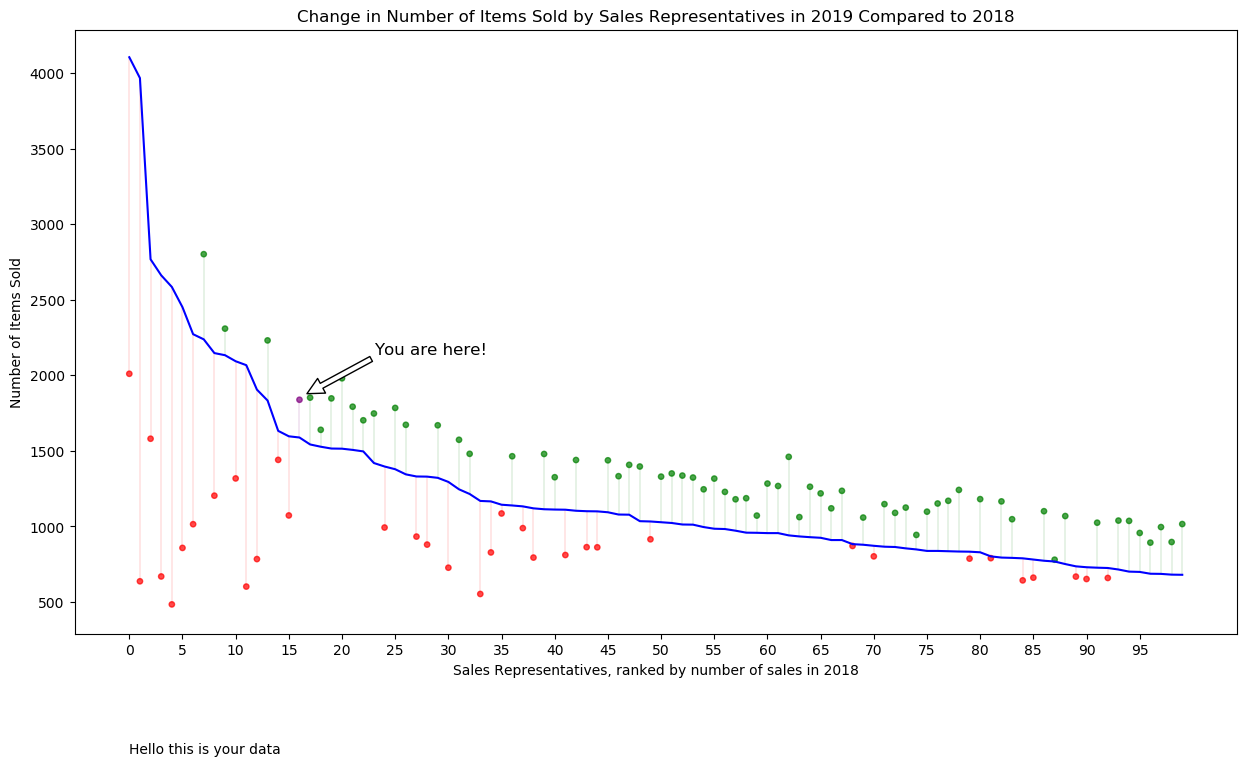

In [ ]:
individual_report('SalesRep_015')

# Column Chart With Two Variables

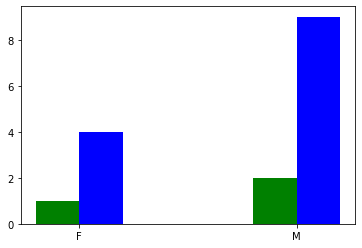

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime
import numpy as np

plt.figure()

x = [
    'F','M'
]
#x = date2num(x)

y = [4, 9]
z = [1, 2]


ax = plt.subplot(111)
ax.bar([k+0.1 for k in range(0, len(x))], y, width=0.2, color='b', align='center')
ax.bar([k-0.1 for k in range(0, len(x))], z, width=0.2, color='g', align='center')
plt.xticks( np.arange(0,2),['F','M'])
#ax.xaxis_date()

plt.show()